In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:\projects_ml\mail_data.csv', encoding='latin1')


In [3]:
print(df)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham              Will Ã¼ b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [4]:
data=df.where((pd.notnull(df)), '')

In [5]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
data.shape

(5572, 2)

In [9]:
data.loc[data['Category']=='spam','Category',]=0
data.loc[data['Category']=='ham','Category']=1

In [10]:
X=data['Message']
Y=data['Category']

In [11]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ã¼ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [12]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


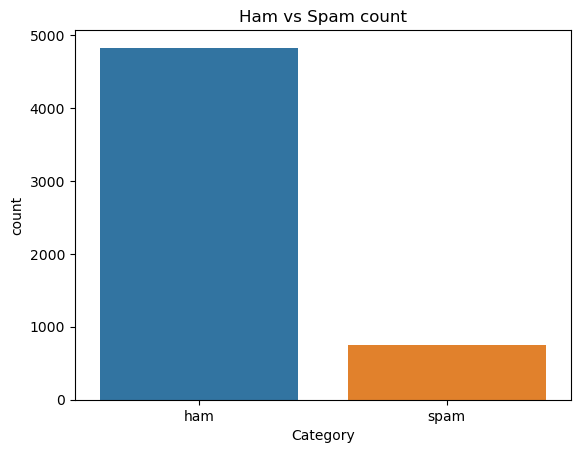

In [13]:
sns.countplot(x = 'Category', data = df)
plt.title('Ham vs Spam count')
plt.show()


In [15]:
#Model Training
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=3)

In [16]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(3900,)
(1672,)


In [17]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(5572,)
(3900,)
(1672,)


In [21]:
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
X_train_features=feature_extraction.fit_transform(X_train)
X_test_features=feature_extraction.transform(X_test)

Y_train=Y_train.astype('int')
Y_test= Y_test.astype('int')

In [22]:
print(X_train)

1455    Can Ã¼ all decide faster cos my sis going home...
3460    Not heard from U4 a while. Call me now am here...
2493    No drama Pls.i have had enough from you and fa...
3378    Yup. Wun believe wat? U really neva c e msg i ...
3826    Hi. I'm always online on yahoo and would like ...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 3900, dtype: object


In [23]:
print(X_train_features)

  (0, 3672)	0.3432522967220488
  (0, 3103)	0.2621778741177127
  (0, 2839)	0.2626580925655478
  (0, 5535)	0.3859565813438123
  (0, 1806)	0.30742323029761626
  (0, 2502)	0.4806340731555739
  (0, 1974)	0.430790562188687
  (0, 6929)	0.29049992008569825
  (1, 4264)	0.25454751074340237
  (1, 4299)	0.33272056276910283
  (1, 3842)	0.2433861866561607
  (1, 6847)	0.2600994552195357
  (1, 6)	0.33272056276910283
  (1, 6175)	0.16521313463046028
  (1, 2067)	0.18864352312402063
  (1, 3692)	0.16295245094503386
  (1, 1154)	0.31698956000242107
  (1, 3896)	0.19423188001633226
  (1, 3555)	0.33272056276910283
  (1, 3472)	0.1449316171395763
  (1, 4293)	0.19008955732757765
  (1, 6360)	0.33272056276910283
  (1, 3019)	0.2841165834640824
  (2, 5124)	0.30299688346739717
  (2, 6576)	0.19459812997829923
  :	:
  (3897, 2922)	0.32603177409174644
  (3897, 4293)	0.2690692327260679
  (3898, 2091)	0.3654387356575668
  (3898, 3653)	0.3140198944936123
  (3898, 6622)	0.3055286729595858
  (3898, 3608)	0.3117604480135819
  (

In [24]:
model=LogisticRegression()

In [40]:
model.fit(X_train_features,Y_train)

LogisticRegression()

In [26]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data=accuracy_score(Y_train,prediction_on_training_data)

In [27]:
print('Acc on Training data : ', accuracy_on_training_data)

Acc on Training data :  0.9664102564102565


In [29]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data=accuracy_score(Y_test,prediction_on_test_data)

In [30]:
print('Acc on test data : ', accuracy_on_test_data)

Acc on test data :  0.9635167464114832


In [32]:
input_your_mail=["Sorry,I can't help you on this."]
input_data_features = feature_extraction.transform(input_your_mail)
prediction=model.predict(input_data_features)
print(prediction)

if (prediction[0]==1):
    print("ham mail")
else:
    print("spam mail")

[1]
ham mail


In [47]:
input_your_mail=["URGENT! Your Mobile number has been awarded with a $2000 prize GUARANTEED. Call 09061790126 from land line. Claim 3030. Valid 12hrs only 150ppm"]
input_data_features = feature_extraction.transform(input_your_mail)
prediction=model.predict(input_data_features)
print(prediction)

if (prediction[0]==1):
    print("ham mail")
else:
    print("spam mail")

[0]
spam mail
